# Intermediate TextMining with Python

 By: Dr. Eric Godat and Dr. Rob Kalescky
 
 Acknowledgements: Garrett Moore, Jaymie Ruddock

 Adapted from: [Ultimate Guide to deal with Text Data (Using Python)](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/)
 
 Natural Language Toolkit: [Documentation](http://www.nltk.org/)
 
 Reference Text: [Natural Language Processing with Python](http://www.nltk.org/book/)
 
 
 *This notebook follows the **Introduction to Working with Text Data** lesson. Please consider looking over that lesson if you have not already*

## Setup

These are the basic libraries we will use in for data manipulation (pandas) and math functions (numpy). We will add more libraries as we need them.

As a best practice, it is a good idea to load all your libraries in a single cell at the top of a notebook, however for the purposes of this tutorial we will load some now and more as we go.

In [1]:
%config InlineBackend.figure_format ='retina'

In [2]:
import pandas as pd
import numpy as np
import glob

## EDGAR Database

Here is the [homepage](https://www.sec.gov/edgar.shtml) for the Securities and Exchange Commission's EDGAR database. If you are having trouble finding a specific company, try their [full text search](https://www.sec.gov/edgar/search/#).

Usage documentation for the Python package can be found [here](https://pypi.org/project/edgar/).

Import the EDGAR python package and define a function that pulls 10-K filings for our companies

In [3]:
from edgar import Company, TXTML

In [4]:
def get_edgar(ll, n):
    filinglist = []
    for el in ll:
        company = Company(el[0], el[2])
        tree = company.get_all_filings(filing_type = "10-K")
        docs = Company.get_documents(tree, no_of_documents=n, as_documents=True)
        texts = Company.get_documents(tree, no_of_documents=n, as_documents=False)
        if n<2:
            docs=[docs]
            texts=[texts]
        for i in range(n):
            date = docs[i].content['Filing Date']
            text = TXTML.parse_full_10K(texts[i])
            filinglist.append([el[0],el[1],el[2],date,text])
    df = pd.DataFrame(filinglist, columns=['Company','Ticker','CIK','Date','Text'])
    return df

Our list of companies: \[Name, Ticker symbol, CIK\]

In [5]:
companies = [
['Alphabet Inc.','(GOOG, GOOGL)','0001652044'],
['AMAZON COM INC','(AMZN)','0001018724'],
['AMERISOURCEBERGEN CORP','(ABC)','0001140859'],
['Apple Inc.','(AAPL)','0000320193'],
['AT&T INC.','(T, TBC, TBB, T-PC, T-PA)','0000732717'],
['BANK OF AMERICA CORP','(BAC, MER-PK, BML-PL, BML-PJ, BML-PH, BML-PG, BAC-PM, BAC-PL, BAC-PK, BAC-PE, BAC-PC, BAC-PB, BAC-PA)','0000070858'],
['BERKSHIRE HATHAWAY INC','(BRK-B, BRK-A)','0001067983'],
['CARDINAL HEALTH INC','(CAH)','0000721371'],
['CHEVRON CORP','(CVX)','0000093410'],
['COSTCO WHOLESALE CORP','(COST)','0000909832'],
['CVS HEALTH Corp','(CVS)','0000064803'],
['EXXON MOBIL CORP','(XOM)','0000034088'],
['Facebook Inc','(FB)','0001326801'],
['FORD MOTOR CO','(F, F-PC, F-PB)','0000037996'],
['General Motors Co','(GM)','0001467858'],
['JPMORGAN CHASE & CO','(JPM, AMJ, PPLN, JPM-PJ, JPM-PH, JPM-PG, JPM-PD, JPM-PC)','0000019617'],
['MCKESSON CORP','(MCK)','0000927653'],
['MICROSOFT CORP','(MSFT)','0000789019'],
['UNITEDHEALTH GROUP INC','(UNH)','0000731766'],
['Walmart Inc.','(WMT)','0000104169'],
['GameStop Corp.','(GME)','0001326380'],
['STARBUCKS CORP','(SBUX)','0000829224']
]


#### Last 3 10Ks with Filing Dates

In [6]:
data = get_edgar(companies,3)

In [7]:
data

,Company,Ticker,CIK,Date,Text
0,Alphabet Inc.,"(GOOG, GOOGL)",0001652044,2021-02-03,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...
1,Alphabet Inc.,"(GOOG, GOOGL)",0001652044,2020-02-04,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
2,Alphabet Inc.,"(GOOG, GOOGL)",0001652044,2019-02-06,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...
3,AMAZON COM INC,(AMZN),0001018724,2021-02-03,\n\n\n\n\namzn-20201231false2020FY0001018724P3...
4,AMAZON COM INC,(AMZN),0001018724,2020-01-31,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
...,...,...,...,...,...
61,GameStop Corp.,(GME),0001326380,2020-03-27,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
62,GameStop Corp.,(GME),0001326380,2019-04-02,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
63,STARBUCKS CORP,(SBUX),0000829224,2020-11-12,\n\n\n\n\nsbux-20200927falseTRUE2020FY00008292...
64,STARBUCKS CORP,(SBUX),0000829224,2019-11-15,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...


## Counting Words and Characters

The first bit of analysis we might want to do is to count the number of words in one piece of data. To do this we will add a column called *wordcount* and write an operation that applies a function to every row of the column.

Unpacking this piece of code, *len(str(x).split(" ")*, tells us what is happening.

For the content of cell *x*, convert it to a string, *str()*, then split that string into pieces at each space, *split()*.

The result of that is a list of all the words in the text and then we can count the length of that list, *len()*.

In [8]:
data['wordcount'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','wordcount']].head()

,Text,wordcount
0,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...,47494
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,44102
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,1851
3,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,34933
4,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,36029


We can do something similar to count the number of characters in the data chunk, including spaces. If you wanted to exclude whitespaces, you could take the list we made above, join it together and count the length of the resulting string.

In [9]:
data = data.fillna("No Information Provided") #If some of our data is missing, this will replace the blank entries. This is only necessary in some cases

In [10]:
data['char_count'] = data['Text'].str.len() ## this also includes spaces, to do it without spaces, you could use something like this: "".join()
data[['Text','char_count']].head()

,Text,char_count
0,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...,375336
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,364302
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,14992
3,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,274004
4,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,305025


Now we want to calculate the average word length in the data.

Let's define a function that will do that for us:

In [11]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

We can now apply that function to all the data chunks and save that in a new column.

In [12]:
data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head()

,Text,avg_word
0,\n\n\n\n\ngoog-20201231FALSE2020FY0001652044P7...,6.608880
1,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,6.342718
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,5.301764
3,\n\n\n\n\namzn-20201231false2020FY0001018724P3...,6.652604
4,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,6.460655


We can then sort by the average word length.

In [13]:
data[['Text','avg_word']].sort_values(by='avg_word', ascending=True).head()

,Text,avg_word
2,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,5.301764
35,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,5.522009
53,\n\n\n\n\nmsft-10k_20180630.htm\n\n\n\n\n\n \n...,5.546546
52,\n\n\n\n\nmsft-10k_20190630.htm\n\n\n\n\n\n \n...,5.580830
38,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n ...,5.622656


# Processing Text

A major component of doing analysis on text is the cleaning of the text prior to the analysis.

Though this process destroys some elements of the text (sentence structure, for example), it is often necessary in order to describe a text analytically. Depending on your choice of cleaning techniques, some elements might be preserved better than others if that is of importance to your analysis.

## Cleaning Up Words

This series of steps aims to clean up and standardize the text itself. This generally consists of removing common elements such as stopwords and punctuation but can be expanded to more detailed removals.

### Lowercase

Here we enforce that all of the text is lowercase. This makes it easier to match cases and sort words.

Notice we are assigning our modified column back to itself. This will save our modifications to our DataFrame

In [14]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0    goog-20201231false2020fy0001652044p7yp3yp3yp1y...
1    document false--12-31fy20190001652044729000000...
2    amendment no. 1 to form 10-k united states sec...
3    amzn-20201231false2020fy0001018724p3yp1yp1yus-...
4    document 0.5p1yp1yp1y0029000000false--12-31fy2...
Name: Text, dtype: object

### Remove Punctuation

Here we remove all punctuation from the data. This allows us to focus on the words only as well as assist in matching.

In [15]:
data['Text'] = data['Text'].str.replace('[^\w\s]','', regex=True)
data['Text'].head()

0    goog20201231false2020fy0001652044p7yp3yp3yp1yp...
1    document false1231fy20190001652044729000000753...
2    amendment no 1 to form 10k united states secur...
3    amzn20201231false2020fy0001018724p3yp1yp1yusga...
4    document 05p1yp1yp1y0029000000false1231fy20190...
Name: Text, dtype: object

### Remove Numeric

Here we remove all the numeric digits from the data. We replace digits with blank spaces, then strip all excess spaces

In [16]:
data['Text'].head()

0    goog20201231false2020fy0001652044p7yp3yp3yp1yp...
1    document false1231fy20190001652044729000000753...
2    amendment no 1 to form 10k united states secur...
3    amzn20201231false2020fy0001018724p3yp1yp1yusga...
4    document 05p1yp1yp1y0029000000false1231fy20190...
Name: Text, dtype: object

In [17]:
data['Text'] = data['Text'].str.replace('[\d]',' ', regex=True)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split()))
data['Text'].head()

0    goog false fy p yp yp yp yp m usgaapaccruedlia...
1    document false fy p y p yp y p yp yp yp m usga...
2    amendment no to form k united states securitie...
3    amzn false fy p yp yp yusgaapaccruedliabilitie...
4    document p yp yp y false fy p yp yp yp y p y p...
Name: Text, dtype: object

### Remove Stopwords

Stopwords are words that are commonly used and do little to aid in the understanding of the content of a text. There is no universal list of stopwords and they vary on the style, time period and media from which your text came from.  Typically, people choose to remove stopwords from their data, as it adds extra clutter while the words themselves provide little to no insight as to the nature of the data.  For now, we are simply going to count them to get an idea of how many there are.

For this tutorial, we will use the standard list of stopwords provided by the Natural Language Toolkit python library.

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0    goog false fy p yp yp yp yp usgaapaccruedliabi...
1    document false fy p p yp p yp yp yp usgaapcomm...
2    amendment form k united states securities exch...
3    amzn false fy p yp yp yusgaapaccruedliabilitie...
4    document p yp yp false fy p yp yp yp p p usgaa...
Name: Text, dtype: object

### Remove Frequent Words

If we want to catch common words that might have slipped through the stopword removal, we can build out a list of the most common words remaining in our text.

Here we have built a list of the 10 most common words. Some of these words might actually be relevant to our analysis so it is important to be careful with this method.

In [19]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

financial    18564
net          15126
income       14240
million      13323
december     12796
may          12635
company      12422
value        12376
assets       12221
tax          11934
dtype: int64

We now follow the same procedure with which we removed stopwords to remove the most frequent words.

In [20]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0    goog false fy p yp yp yp yp usgaapaccruedliabi...
1    document false fy p p yp p yp yp yp usgaapcomm...
2    amendment form k united states securities exch...
3    amzn false fy p yp yp yusgaapaccruedliabilitie...
4    document p yp yp false fy p yp yp yp p p usgaa...
Name: Text, dtype: object

## Lemmatization

Lemmatization is often a more useful approach than stemming because it leverages an understanding of the word itself to convert the word back to its root word. However, this means lemmatization is less aggressive than stemming (probably a good thing).

In [21]:
#import nltk
#nltk.download('wordnet')

In [22]:
from textblob import Word
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0    goog false fy p yp yp yp yp usgaapaccruedliabi...
1    document false fy p p yp p yp yp yp usgaapcomm...
2    amendment form k united state security exchang...
3    amzn false fy p yp yp yusgaapaccruedliabilitie...
4    document p yp yp false fy p yp yp yp p p usgaa...
Name: Text, dtype: object

At this point we have a several options for cleaning and structuring our text data. The next section will focus on more advanced ways to study text analytically.

# Advanced Text Processing

This section focuses on more complex methods of analyzing textual data. We will continue to work with our same DataFrame.

## N-grams

N-grams are combinations of multiple words as they appear in the text. The N refers to the number of words captured in the list. N-grams with N=1 are referred unigrams and are just a nested list of all the words in the text. Following a similar pattern, bigrams (N=2), trigrams (N=3), etc. can be used.

N-grams allow you to capture the structure of the text which can be very useful. For instance, counting the number of bigrams where "said" was preceded by "he" vs "she" could give you an idea of the gender breakdown of speakers in a text. However, if you make your N-grams too long, you lose the ability to make comparisons.

Another concern, especially in very large data sets, is that the memory storage of N-grams scales with N (bigrams are twice as large as unigrams, for example) and the time to process the N-grams can balloon dramatically as well.

All that being said, we would suggest focusing on bigrams and trigrams as useful analysis tools.

In [66]:
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

lemmatizer = WordNetLemmatizer()
n_grams = TextBlob(data['Text'][0]).ngrams(2)

In [69]:
key_words=[]
for i in ['service', 'investor', 'product']:
     key_words.append(lemmatizer.lemmatize(i))

In [70]:
for n in n_grams:
    if n[1] in key_words:
        print(n)

['fee', 'service']
['business', 'product']
['product', 'service']
['google', 'service']
['build', 'product']
['google', 'service']
['helpful', 'product']
['people', 'product']
['made', 'service']
['google', 'service']
['core', 'product']
['worldour', 'product']
['product', 'service']
['hardware', 'product']
['beautiful', 'product']
['helpful', 'product']
['advertising', 'product']
['range', 'product']
['google', 'service']
['advertiser', 'product']
['product', 'service']
['cloud', 'service']
['cloud', 'product']
['platform', 'service']
['tv', 'service']
['outside', 'investor']
['information', 'service']
['network', 'product']
['product', 'service']
['video', 'service']
['hardware', 'product']
['cloud', 'service']
['innovative', 'product']
['retainingusers', 'product']
['product', 'service']
['availability', 'product']
['device', 'service']
['japangoogles', 'product']
['way', 'product']
['specialized', 'service']
['trademark', 'service']
['wwwabcxyz', 'investor']
['available', 'investor

In [71]:
from nltk import ngrams
from collections import Counter

ngram_counts = Counter(ngrams(data['Text'][0].split(), 2))
for n in ngram_counts.most_common(10):
    print(n)

(('table', 'contentsalphabet'), 98)
(('product', 'service'), 98)
(('gain', 'loss'), 75)
(('report', 'form'), 71)
(('year', 'ended'), 64)
(('equity', 'security'), 63)
(('form', 'k'), 54)
(('foreign', 'currency'), 54)
(('capital', 'stock'), 53)
(('consolidated', 'statement'), 50)


## Term Frequency

Term Frequency is a measure of how often a term appears in a document. There are different ways to define this but the simplest is a raw count of the number of times each term appears.

There are other ways of defining this including a true term frequency and a log scaled definition. All three have been implemented below but the default will the raw count definition, as it matches with the remainder of the definitions in this tutorial.

|Definition|Formula|
|---|---|
|Raw Count|$$f_{t,d}$$|
|Term Frequency|$$\frac{f_{t,d}}{\sum_{t'\in d}f_{t',d}}$$|
|Log Scaled|$$\log(1+f_{t,d})$$|



In [72]:
## Raw Count Definition
tf1 = (data['Text'].head(15)[::3]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

## Term Frequency Definition
#tf1 = (data['Text'][0:5]).apply(lambda x: (pd.value_counts(x.split(" ")))/len(x.split(" "))).sum(axis = 0).reset_index() 

## Log Scaled Definition
#tf1 = (data['Text'][0:10]).apply(lambda x: 1.0+np.log(pd.value_counts(x.split(" ")))).sum(axis = 0).reset_index() 

tf1.columns = ['words','tf']
tf1.sort_values(by='tf', ascending=False)[:10]

,words,tf
2,service,1271.0
13,year,862.0
96,company,855.0
7,business,837.0
30,cash,810.0
46,note,800.0
17,cost,789.0
16,operating,786.0
6,product,735.0
10,including,729.0


## Inverse Document Frequency

Inverse Document Frequency is a measure of how common or rare a term is across multiple documents. That gives a measure of how much weight that term carries.

For a more concrete analogy of this, imagine a room full of NBA players; here a 7 foot tall person wouldn't be all that shocking. However if you have a room full of kindergarten students, a 7 foot tall person would be a huge surprise.

The simplest and standard definition of Inverse Document Frequency is to take the logarithm of the ratio of the number of documents containing a term to the total number of documents.

$$-\log\frac{n_t}{N} = \log\frac{N}{n_t}$$


In [73]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))

tf1[:10]

,words,tf,idf
0,revenue,694.0,0.015267
1,google,216.0,1.356441
2,service,1271.0,0.015267
3,loss,644.0,0.015267
4,result,658.0,0.000000
5,security,585.0,0.000000
6,product,735.0,0.015267
7,business,837.0,0.015267
8,change,624.0,0.000000
9,could,544.0,0.015267


## Term Frequency – Inverse Document Frequency ([TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))

Term Frequency – Inverse Document Frequency (TF-IDF) is a composite measure of both Term Frequency and Inverse Document Frequency.

From [Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf):
"A high weight in TF–IDF is reached by a high term frequency (in the given document) and a low document frequency of the term in the whole collection of documents; the weights hence tend to filter out common terms"

More concisely, a high TD-IDF says that a word is very important in the documents in which it appears.

There are a few weighting schemes for TF-IDF. Here we use scheme (1).

|Weighting Scheme|Document Term Weight|
|---|---|
|(1)|$$f_{t,d}\cdot\log\frac{N}{n_t}$$|
|(2)|$$1+\log(f_{t,d})$$|
|(3)|$$(1+\log(f_{t,d}))\cdot\log\frac{N}{n_t}$$|

In [74]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.sort_values(by='tfidf', ascending=False)[:10]

,words,tf,idf,tfidf
7702,incdollars,130.0,3.496508,454.545983
38,contentsalphabet,98.0,3.496508,342.657741
1,google,216.0,1.356441,292.991342
3007,broadband,106.0,2.580217,273.502984
5395,pharmedium,88.0,3.091042,272.011736
5212,wireless,177.0,1.245216,220.403190
5393,amerisourcebergen,100.0,2.110213,211.021320
592,video,217.0,0.970779,210.659025
3160,subscriber,99.0,2.110213,208.911107
7705,warnermedia,65.0,3.091042,200.917759


It is worth noting that the *sklearn* library has the ability to directly calculate a TD-IDF matrix.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Text'])

data_vect

<66x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 58379 stored elements in Compressed Sparse Row format>

## Similarity

In [76]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # This suppresses a warning from scikit learn that they are going to update their code

One thing we can look at is how similar two texts are. This has a practical use when looking for plagiarism, but can also be used to compare author's styles. To do this there are a few ways we can measure similarity.

First we need to set up our two sets of texts. Here we have the ability to choose the size of our sets and whether we want the first n texts from our full data set or just a random sample. Keep in mind that if you want to use two dissimilar sets, you won't have a control value (something x itself).

In [77]:
import re

def make_ticker(ticker):
    
    ticker = [tuple(str(i) for i in el.strip('()').split(',')) for el in ticker.split('),(')][0][0]
    
    return ticker

In [78]:
data['Ticker_short'] = data['Ticker'].apply(lambda x: make_ticker(x))

data['Index']=data['Ticker_short']+": "+data['Date']

In [79]:
size=15

In [80]:
## First n by First n
set1 = data[["Index",'Text','Company']].head(size)[::3]
set2 = data[["Index",'Text','Company']].head(size)[::3]

## Random X Itself
#set1 = data[["Index",'Text','Company']].sample(size)
#set2 = set1

## First n by Random
#set1 = data[["Index",'Text','Company']][:size]
#set2 = data[["Index",'Text','Company']].sample(size)

## Random X Random
#set1 = data[["Index",'Text','Company']].sample(size)
#set2 = data[["Index",'Text','Company']].sample(size)

In [81]:
#To let us do a "cross join": Every row in one gets matched to all rows in the other
set1['key']=1 
set2['key']=1

similarity = pd.merge(set1, set2, on ='key', suffixes=('_1', '_2')).drop("key", 1)

### Jaccard Similarity

The first is using a metric called the [Jaccard Index](https://en.wikipedia.org/wiki/Jaccard_index). This is just taking the intersection of two sets of things (in our case, words or n-grams) and dividing it by the union of those sets. This gives us a metric for understanding how the word usage compares but doesn't account for repeated words since the union and intersections just take unique words. One advantage though is that we can easily extend the single word similarity to compare bi-grams and other n-grams if we want to examine phrase usage.

$$S_{J}(A,B)=\frac{A \cap B}{A \cup B}$$


In [82]:
def jaccard(row, n=1):
    
    old=row['Text_1']
    new=row['Text_2']
    
    old_n_grams = [tuple(el) for el in TextBlob(old).ngrams(n)]
    new_n_grams = [tuple(el) for el in TextBlob(new).ngrams(n)]
        
    union = list(set(old_n_grams) | set(new_n_grams))
    intersection = list(set(old_n_grams) & set(new_n_grams))
    
    lu = len(union)
    li = len(intersection)
    
    return (li/lu,li,lu)

In [83]:
for i in [1,2]: # Add values to the list for the n-gram you're interested in
    similarity['Jaccard_Index_for_{}_grams'.format(i)]=similarity.apply(lambda x: jaccard(x,i)[0],axis=1)

In [84]:
similarity['Intersection']=similarity.apply(lambda x: jaccard(x)[1],axis=1)

In [85]:
similarity['Union']=similarity.apply(lambda x: jaccard(x)[2],axis=1)

In [86]:
similarity.head()

,Index_1,Text_1,Company_1,Index_2,Text_2,Company_2,Jaccard_Index_for_1_grams,Jaccard_Index_for_2_grams,Intersection,Union
0,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,1.000000,1.000000,4117,4117
1,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,AMZN: 2021-02-03,amzn false fy p yp yp yusgaapaccruedliabilitie...,AMAZON COM INC,0.342374,0.095471,1843,5383
2,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,ABC: 2020-11-19,abc fyfalseusgaapaccountingstandardsupdate mem...,AMERISOURCEBERGEN CORP,0.326707,0.073145,1890,5785
3,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,AAPL: 2020-10-30,aapl truetruetruetruetruetruetruetruetruetruef...,Apple Inc.,0.341081,0.093499,1805,5292
4,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,T: 2021-02-25,false fy usgaapaccountspayableandaccruedliabil...,AT&T INC.,0.295684,0.066423,2076,7021


### Cosine Similarity

The second metric we can use is [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity), however there is a catch here. Cosine similarity requires a vector for each word so we make a choice here to use term frequency. You could choose something else, inverse document frequency or tf-idf would both be good choices. Cosine similarity with a term frequency vector gives us something very similar to the Jaccard Index but accounts for word repetition. This makes it better for tracking word importance between two texts.

$$S_{C}(v_1,v_2)=cos(\theta)=\frac{v_1\cdot v_2}{||v_1||\times||v_2||}$$

In [87]:
def get_cosine_sim(str1,str2): 
    vectors = [t for t in get_vectors([str1,str2])]
    return cosine_similarity(vectors)
    
def get_vectors(slist):
    text = [t for t in slist]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

def cosine(row):
    
    old=row['Text_1']
    new=row['Text_2']
    
    return get_cosine_sim(old,new)[0,1]   

In [88]:
similarity['Cosine_Similarity']=similarity.apply(lambda x: cosine(x),axis=1)

In [89]:
similarity.head()

,Index_1,Text_1,Company_1,Index_2,Text_2,Company_2,Jaccard_Index_for_1_grams,Jaccard_Index_for_2_grams,Intersection,Union,Cosine_Similarity
0,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,1.000000,1.000000,4117,4117,1.000000
1,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,AMZN: 2021-02-03,amzn false fy p yp yp yusgaapaccruedliabilitie...,AMAZON COM INC,0.342374,0.095471,1843,5383,0.819295
2,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,ABC: 2020-11-19,abc fyfalseusgaapaccountingstandardsupdate mem...,AMERISOURCEBERGEN CORP,0.326707,0.073145,1890,5785,0.698211
3,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,AAPL: 2020-10-30,aapl truetruetruetruetruetruetruetruetruetruef...,Apple Inc.,0.341081,0.093499,1805,5292,0.705764
4,GOOG: 2021-02-03,goog false fy p yp yp yp yp usgaapaccruedliabi...,Alphabet Inc.,T: 2021-02-25,false fy usgaapaccountspayableandaccruedliabil...,AT&T INC.,0.295684,0.066423,2076,7021,0.739292


### Visualize Similarity

In [90]:
metric = 'Cosine_Similarity'
#metric = 'Jaccard_Index_for_1_grams'

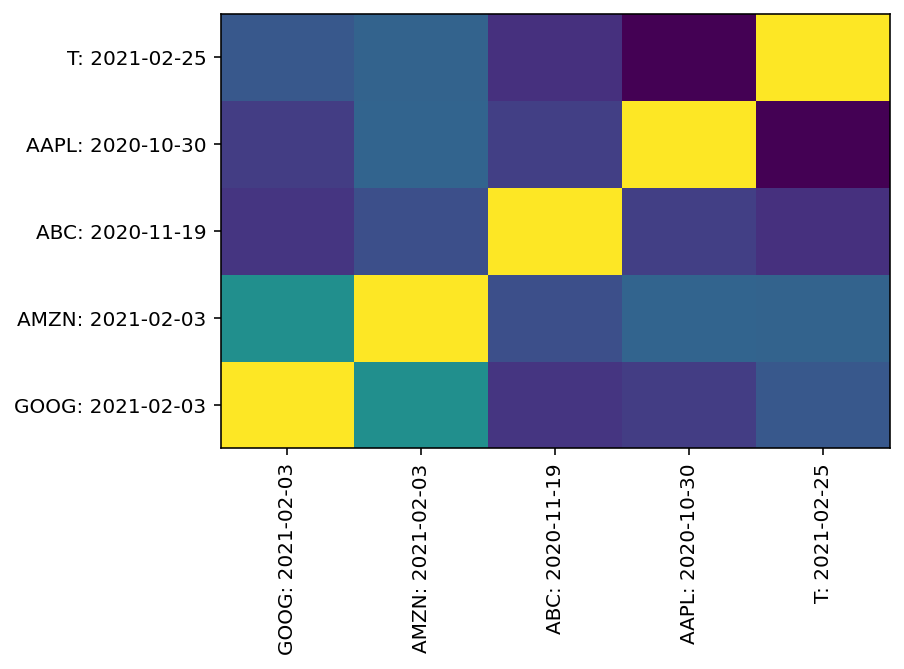

In [91]:
import numpy as np 
import matplotlib.pyplot as plt

index = list(similarity['Index_1'].unique())
columns = list(similarity['Index_2'].unique())
df = pd.DataFrame(0, index=index, columns=columns)

for i in df.index:
    sub = similarity[(similarity['Index_1']==i)]
    for col in df.columns:
        df.loc[i,col]=sub[sub['Index_2']==col][metric].iloc[0]
        
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns,rotation = 90)
plt.show()

In [92]:
similarity[['Company_1','Index_1','Company_2','Index_2',metric]].sort_values(by=metric,ascending=False)

,Company_1,Index_1,Company_2,Index_2,Cosine_Similarity
6,AMAZON COM INC,AMZN: 2021-02-03,AMAZON COM INC,AMZN: 2021-02-03,1.000000
12,AMERISOURCEBERGEN CORP,ABC: 2020-11-19,AMERISOURCEBERGEN CORP,ABC: 2020-11-19,1.000000
18,Apple Inc.,AAPL: 2020-10-30,Apple Inc.,AAPL: 2020-10-30,1.000000
24,AT&T INC.,T: 2021-02-25,AT&T INC.,T: 2021-02-25,1.000000
0,Alphabet Inc.,GOOG: 2021-02-03,Alphabet Inc.,GOOG: 2021-02-03,1.000000
1,Alphabet Inc.,GOOG: 2021-02-03,AMAZON COM INC,AMZN: 2021-02-03,0.819295
5,AMAZON COM INC,AMZN: 2021-02-03,Alphabet Inc.,GOOG: 2021-02-03,0.819295
8,AMAZON COM INC,AMZN: 2021-02-03,Apple Inc.,AAPL: 2020-10-30,0.755685
16,Apple Inc.,AAPL: 2020-10-30,AMAZON COM INC,AMZN: 2021-02-03,0.755685
21,AT&T INC.,T: 2021-02-25,AMAZON COM INC,AMZN: 2021-02-03,0.754500


## [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model)

[Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) a way to represent text based on the idea that similar texts will contain similar vocabulary. There is a lot to this model and we provide merely a simple implementation of it here.

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow

<66x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 58923 stored elements in Compressed Sparse Row format>

## Sentiment Analysis

Sentiment is a way of measuring the overall positivity or negativity in a given text.

To do this we will use the built in sentiment function in the *TextBlob* package. This function will return the polarity and subjectivity scores for each data chunk.

In [94]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0     (0.09545980983617208, 0.4167079805899506)
1     (0.09005094551809101, 0.4216207926038523)
2    (0.10356557856557856, 0.44503627003626967)
3    (0.07856212877900404, 0.39336252260183946)
4      (0.07140231831463165, 0.388809805796745)
Name: Text, dtype: object

Focusing on the polarity score, we are able to see the overall sentiment of each data chunk. The closer to 1 the more positive and the closer to -1 the more negative.

In [95]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

,Text,sentiment
0,goog false fy p yp yp yp yp usgaapaccruedliabi...,0.095460
1,document false fy p p yp p yp yp yp usgaapcomm...,0.090051
2,amendment form k united state security exchang...,0.103566
3,amzn false fy p yp yp yusgaapaccruedliabilitie...,0.078562
4,document p yp yp false fy p yp yp yp p p usgaa...,0.071402


Here we have textted the sentiment scores for the first 10 chunks.

Notice they tend to be positive but not exceedingly so.

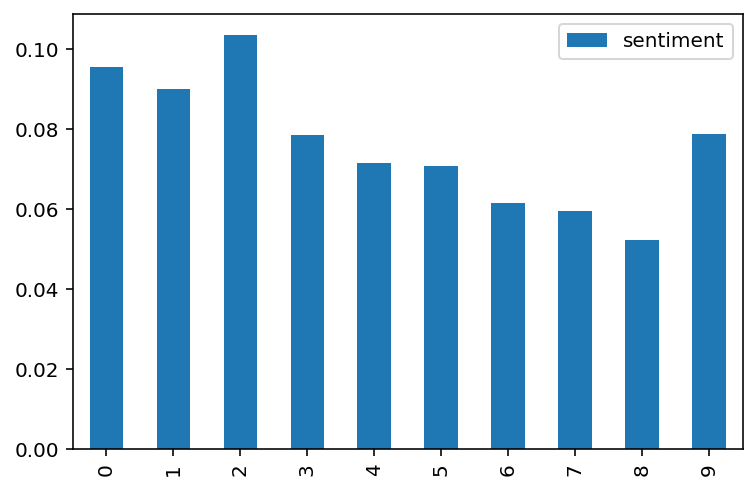

In [96]:
plot_1 = data[['sentiment']][:10].plot(kind='bar')

Now we have sorted and textted all of the sentiment scores for the chunks in our database.

We can clearly see that most of the text data is positive but not overwhelmingly so (as seen by the long tail of the distribution). However, the parts that are negative tend to be more polarized than the positive ones (a shorter tail and sharper peak).

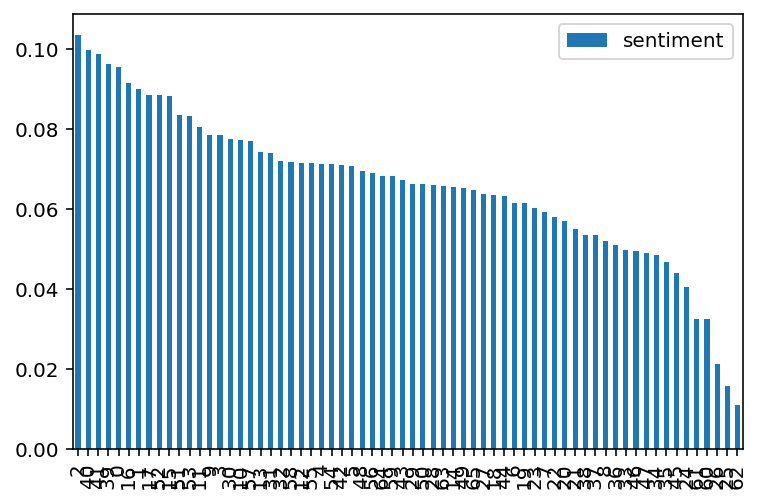

In [97]:
plot_2 = data[['sentiment']].sort_values(by='sentiment', ascending=False).plot(kind='bar')

## Using TF-IDF and Machine Learning

This is significantly more advanced than the rest of the tutorial. This takes the TF-IDF matrix and applies a [k-means clustering algorithm](https://en.wikipedia.org/wiki/K-means_clustering). This groups the texts into clusters of similar terms from the TF-IDF matrix. This algorithm randomly seeds X "means", the values are then clustered into the nearest mean. The centroid of the values in each cluster then becomes the new mean and the process repeats until a convergence is reached.

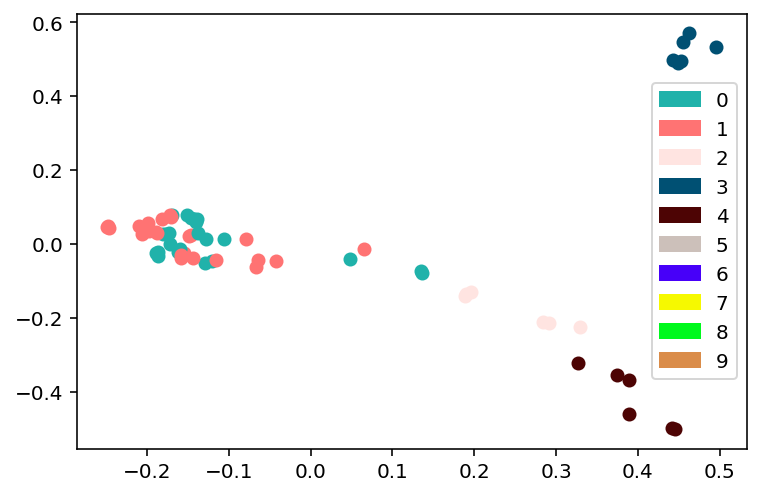

In [98]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

groups = 5

num_clusters = groups
num_seeds = groups
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# calculate tf-idf of texts
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
tf_idf_matrix = tfidf.fit_transform(data['Text'])

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tf_idf_matrix)
#print(labels)

X = tf_idf_matrix.todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print(reduced_data)

import matplotlib.patches as mpatches
legendlist=[mpatches.Patch(color=labels_color_map[key],label=str(key))for key in labels_color_map.keys()]

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    #print(instance, index, labels[index])
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.legend(handles=legendlist)
plt.show()



# t-SNE plot
#embeddings = TSNE(n_components=tsne_num_components)
#Y = embeddings.fit_transform(X)
#plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
#plt.show()


In [99]:
tfidf_test = tf1.sort_values(by='tfidf', ascending=False)[:1000]

In [100]:
title_groups = np.transpose([labels,data['Company'],data['Date']])

These are the titles of the texts in each cluster. Keep in mind that each time you run the algorithm, the randomness in generating the initial means will result in different clusters.

In [101]:
for i in range(len(title_groups)):
    data.loc[i,'Group'] = title_groups[i][0]

In [102]:
grp=1
data[data['Group']==grp]['Company']#.sample(15)

2              Alphabet Inc.
6     AMERISOURCEBERGEN CORP
7     AMERISOURCEBERGEN CORP
8     AMERISOURCEBERGEN CORP
12                 AT&T INC.
13                 AT&T INC.
14                 AT&T INC.
21       CARDINAL HEALTH INC
22       CARDINAL HEALTH INC
23       CARDINAL HEALTH INC
30           CVS HEALTH Corp
31           CVS HEALTH Corp
32           CVS HEALTH Corp
48             MCKESSON CORP
49             MCKESSON CORP
50             MCKESSON CORP
54    UNITEDHEALTH GROUP INC
55    UNITEDHEALTH GROUP INC
56    UNITEDHEALTH GROUP INC
57              Walmart Inc.
58              Walmart Inc.
59              Walmart Inc.
60            GameStop Corp.
61            GameStop Corp.
62            GameStop Corp.
Name: Company, dtype: object

In [103]:
for i in range(groups):
    print("")
    print("#### {} ###".format(i))
    print("")
    for el in title_groups:
        if el[0]==i:
            print("{}".format(el[1]))


#### 0 ###

Alphabet Inc.
Alphabet Inc.
AMAZON COM INC
AMAZON COM INC
AMAZON COM INC
Apple Inc.
Apple Inc.
Apple Inc.
BERKSHIRE HATHAWAY INC
BERKSHIRE HATHAWAY INC
BERKSHIRE HATHAWAY INC
COSTCO WHOLESALE CORP
COSTCO WHOLESALE CORP
COSTCO WHOLESALE CORP
Facebook Inc
Facebook Inc
Facebook Inc
MICROSOFT CORP
MICROSOFT CORP
MICROSOFT CORP
STARBUCKS CORP
STARBUCKS CORP
STARBUCKS CORP

#### 1 ###

Alphabet Inc.
AMERISOURCEBERGEN CORP
AMERISOURCEBERGEN CORP
AMERISOURCEBERGEN CORP
AT&T INC.
AT&T INC.
AT&T INC.
CARDINAL HEALTH INC
CARDINAL HEALTH INC
CARDINAL HEALTH INC
CVS HEALTH Corp
CVS HEALTH Corp
CVS HEALTH Corp
MCKESSON CORP
MCKESSON CORP
MCKESSON CORP
UNITEDHEALTH GROUP INC
UNITEDHEALTH GROUP INC
UNITEDHEALTH GROUP INC
Walmart Inc.
Walmart Inc.
Walmart Inc.
GameStop Corp.
GameStop Corp.
GameStop Corp.

#### 2 ###

FORD MOTOR CO
FORD MOTOR CO
FORD MOTOR CO
General Motors Co
General Motors Co
General Motors Co

#### 3 ###

CHEVRON CORP
CHEVRON CORP
CHEVRON CORP
EXXON MOBIL CORP
EXXON MOBI

## EDGAR Excel Collection

This is a short section on how to mass download Excel files from the SEC EDGAR database.

### Download Excel Files

In [104]:
# Allows us to download files from webpages directly
import requests

In [105]:
# Function the accepts: CIK number, 2 digit fiscal year (e.g. 20). Optional arguments for number of attempted file names and path.
# It prints the name of the file IF it locates a file with that name and downloads it
def get_edgar_xlsx(cik, fy, n=15, path="."):
    for i in range(n):
        url = 'https://www.sec.gov/Archives/edgar/data/{}/{}{}{}/Financial_Report.xlsx'.format(cik,cik.zfill(10),fy,str(i).zfill(6))
        if str(requests.get(url))=='<Response [200]>':
            print('Financial_Report_{}{}{}.xlsx'.format(cik.zfill(10),fy,str(i).zfill(6)))
            open('{}/Financial_Report_{}{}{}.xlsx'.format(path,cik.zfill(10),fy,str(i).zfill(6)), 'wb').write(requests.get(url).content)

In [106]:
test_company = companies[0]
test_cik = test_company[2]
test_fy = 20
test_company

['Alphabet Inc.', '(GOOG, GOOGL)', '0001652044']

In [107]:
get_edgar_xlsx(test_cik,test_fy)

Financial_Report_000165204420000004.xlsx
Financial_Report_000165204420000008.xlsx


In [108]:
for j in range(0, 15, 3):
    get_edgar_xlsx(companies[j][2],20)

Financial_Report_000165204420000004.xlsx
Financial_Report_000165204420000008.xlsx
Financial_Report_000032019320000008.xlsx
Financial_Report_000032019320000010.xlsx
Financial_Report_000090983220000004.xlsx
Financial_Report_000090983220000009.xlsx
Financial_Report_000132680120000010.xlsx
Financial_Report_000132680120000013.xlsx


### Upload Excel Files

In [109]:
test_excel = pd.read_excel('Financial_Report_000165204420000004.xlsx', index_col=0, engine='openpyxl')

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
test_excel